In [2]:
import cv2
import numpy as np 
import mediapipe as mp 
import pandas as pd
import csv
import os
from sklearn.model_selection import train_test_split

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [49]:
cap = cv2.VideoCapture('bad.mp4')
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
#         # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(251,172,7), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(172,7,251), thickness=1, circle_radius=1)
                                 )
        
#         # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(31,16,18), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(41,1,85), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

#         # # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
                        
        cv2.imshow('HELLO FROM THE OTHER SIDE', image)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [50]:
results.face_landmarks.landmark[0]

x: 0.5234430432319641
y: 0.13592718541622162
z: -0.007360453251749277

In [51]:
results.face_landmarks.landmark[0].x

0.5234430432319641

In [52]:
results.right_hand_landmarks.landmark[0].y

0.529163658618927

In [53]:
len_coords = len(results.right_hand_landmarks.landmark)+len(results.face_landmarks.landmark)
+len(results.left_hand_landmarks.landmark)+len(results.pose_landmarks.landmark)
len_coords

543

In [54]:
print(len(results.right_hand_landmarks.landmark))
print(len(results.face_landmarks.landmark))
print(len(results.left_hand_landmarks.landmark))
print(len(results.pose_landmarks.landmark))

21
468
21
33


In [55]:
landmarks = ['class']
for value in range(1, len_coords+1):
    landmarks += ['x{}'.format(value), 'y{}'.format(value), 'z{}'.format(value), 'v{}'.format(value)]

In [23]:
len(landmarks)

2173

In [24]:
landmarks[-1]

'v543'

In [25]:
with open('coordsgood.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [26]:

class_name = 'good'
# class_name = 'bad'

In [27]:
cap = cv2.VideoCapture("bad.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
#         # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(251,172,7), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(172,7,251), thickness=1, circle_radius=1)
                                 )
        
#         # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(31,16,18), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(41,1,85), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

#         # # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

        try:
            # Extract right Hand landmarks
            right = results.right_hand_landmarks.landmark
            right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

            # Extract Left Hand landmark
            left = results.left_hand_landmarks.landmark
            left_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left]).flatten())

            # ExtractPose Detections landmark
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())


            # Concate rows
            row = right_row + face_row + pose_row + left_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coordsgr.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        
                csv_writer.writerow(row)
        except:
            pass
                        
        cv2.imshow('HELLO FROM THE OTHER SIDE', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [4]:
df = pd.read_csv('coordsgr.csv')

In [5]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z541,v541,x542,y542,z542,v542,x543,y543,z543,v543
0,bad,0.459131,0.532111,-3.965370e-08,0.0,0.466909,0.543488,-0.006367,0.0,0.470308,...,0.001180,0.0,0.585406,0.606296,0.001197,0.0,0.581557,0.608803,0.001554,0.0
1,bad,0.459111,0.533647,-3.380451e-08,0.0,0.466485,0.543434,-0.006047,0.0,0.469812,...,-0.000014,0.0,0.585327,0.604699,-0.000005,0.0,0.581596,0.607207,0.000306,0.0
2,bad,0.459363,0.534511,-2.887919e-08,0.0,0.466604,0.543454,-0.006862,0.0,0.469873,...,-0.000559,0.0,0.585151,0.604227,-0.000655,0.0,0.581338,0.606893,-0.000377,0.0
3,bad,0.459373,0.535327,-2.842359e-08,0.0,0.466621,0.543440,-0.007046,0.0,0.469917,...,-0.001133,0.0,0.585008,0.604089,-0.001236,0.0,0.581120,0.606371,-0.000921,0.0
4,bad,0.459021,0.534654,-2.795597e-08,0.0,0.466382,0.542711,-0.007329,0.0,0.469766,...,-0.000458,0.0,0.585418,0.603670,-0.000559,0.0,0.581642,0.606271,-0.000281,0.0


In [6]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z541,v541,x542,y542,z542,v542,x543,y543,z543,v543
4210,good,0.445927,0.759111,-2.722531e-08,0.0,0.456536,0.733331,-0.002651,0.0,0.468629,...,-0.015512,0.0,0.489487,0.811668,-0.015822,0.0,0.485114,0.817233,-0.016663,0.0
4211,good,0.445981,0.758496,-1.546272e-08,0.0,0.456352,0.733190,-0.002688,0.0,0.468649,...,-0.015078,0.0,0.489301,0.816543,-0.015096,0.0,0.484956,0.821885,-0.015656,0.0
4212,good,0.445042,0.758687,-1.818555e-08,0.0,0.456158,0.733309,-0.002216,0.0,0.468524,...,-0.012165,0.0,0.490198,0.814362,-0.011698,0.0,0.485939,0.820624,-0.011997,0.0
4213,good,0.445813,0.756428,-2.726201e-08,0.0,0.456252,0.731125,-0.003454,0.0,0.468442,...,-0.012706,0.0,0.489882,0.811030,-0.012352,0.0,0.485927,0.816207,-0.012705,0.0
4214,good,0.444174,0.756719,-3.094629e-08,0.0,0.455903,0.731196,-0.001830,0.0,0.468708,...,-0.012198,0.0,0.490049,0.810562,-0.011655,0.0,0.485572,0.815435,-0.011999,0.0


In [7]:
df.sample(5)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z541,v541,x542,y542,z542,v542,x543,y543,z543,v543
344,bad,0.451609,0.514942,-2.778363e-08,0.0,0.459610,0.521881,-0.005363,0.0,0.463242,...,-0.001328,0.0,0.583089,0.578363,-0.001307,0.0,0.579104,0.580021,-0.000946,0.0
3806,good,0.369650,0.745056,6.826581e-08,0.0,0.380303,0.709095,-0.007323,0.0,0.382374,...,-0.032641,0.0,0.611024,0.751940,-0.035489,0.0,0.615236,0.757231,-0.037453,0.0
3407,good,0.396085,0.731911,-3.836029e-08,0.0,0.401121,0.701184,-0.005433,0.0,0.405817,...,-0.032175,0.0,0.583977,0.761349,-0.035083,0.0,0.578903,0.770742,-0.036895,0.0
2805,good,0.359131,0.713294,-5.572212e-09,0.0,0.369001,0.668806,-0.005921,0.0,0.371130,...,-0.023183,0.0,0.596127,0.642974,-0.024877,0.0,0.596866,0.631061,-0.025940,0.0
2436,good,0.416584,0.712591,1.987322e-08,0.0,0.432866,0.679423,-0.005318,0.0,0.451662,...,-0.025189,0.0,0.490678,0.757993,-0.027493,0.0,0.484608,0.769569,-0.029680,0.0


In [8]:
df[df['class'] == 'good']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z541,v541,x542,y542,z542,v542,x543,y543,z543,v543
1293,good,0.397758,0.767454,1.727235e-08,0.0,0.401080,0.751890,-0.004159,0.0,0.399910,...,-0.021524,0.0,0.514228,0.790755,-0.023370,0.0,0.504473,0.800469,-0.024836,0.0
1294,good,0.364132,0.725926,1.611582e-08,0.0,0.373467,0.688166,-0.004414,0.0,0.388776,...,-0.021091,0.0,0.513916,0.755546,-0.022163,0.0,0.504410,0.762938,-0.023188,0.0
1295,good,0.363354,0.715295,2.241334e-08,0.0,0.371161,0.681226,-0.007155,0.0,0.389143,...,-0.021087,0.0,0.514398,0.754542,-0.023349,0.0,0.504312,0.763844,-0.025144,0.0
1296,good,0.362468,0.682584,1.562754e-08,0.0,0.376502,0.649005,-0.004090,0.0,0.394896,...,-0.024313,0.0,0.518377,0.719971,-0.025787,0.0,0.508067,0.725551,-0.027111,0.0
1297,good,0.362870,0.650846,6.555886e-08,0.0,0.373888,0.618721,-0.005227,0.0,0.390422,...,-0.024090,0.0,0.526327,0.691493,-0.026020,0.0,0.515671,0.695597,-0.027795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210,good,0.445927,0.759111,-2.722531e-08,0.0,0.456536,0.733331,-0.002651,0.0,0.468629,...,-0.015512,0.0,0.489487,0.811668,-0.015822,0.0,0.485114,0.817233,-0.016663,0.0
4211,good,0.445981,0.758496,-1.546272e-08,0.0,0.456352,0.733190,-0.002688,0.0,0.468649,...,-0.015078,0.0,0.489301,0.816543,-0.015096,0.0,0.484956,0.821885,-0.015656,0.0
4212,good,0.445042,0.758687,-1.818555e-08,0.0,0.456158,0.733309,-0.002216,0.0,0.468524,...,-0.012165,0.0,0.490198,0.814362,-0.011698,0.0,0.485939,0.820624,-0.011997,0.0
4213,good,0.445813,0.756428,-2.726201e-08,0.0,0.456252,0.731125,-0.003454,0.0,0.468442,...,-0.012706,0.0,0.489882,0.811030,-0.012352,0.0,0.485927,0.816207,-0.012705,0.0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

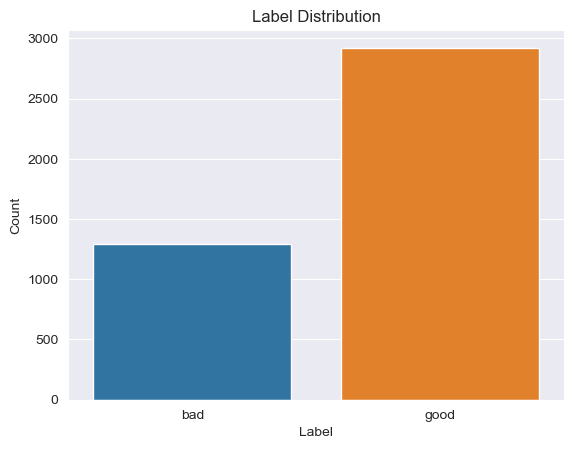

In [10]:
sns.countplot(data=df, x='class')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [11]:
X = df.drop('class', axis=1) 
y = df['class']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'dc':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}


In [14]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [15]:
accuracy_scores = {}
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[algo] = accuracy

accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
accuracy_df.index.name = 'Algorithm'

print(accuracy_df)

           Accuracy
Algorithm          
lr              1.0
dc              1.0
rf              1.0
gb              1.0


In [16]:
fit_models['rf'].predict(X_test)

array(['good', 'good', 'good', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'bad', 'good', 'bad', 'good', 'good', 'bad',
       'good', 'good', 'good', 'bad', 'bad', 'good', 'bad', 'good',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'good',
       'good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'bad', 'bad', 'bad', 'bad', 'good', 'bad', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'bad', 'good',
       'good', 'good', 'good', 'bad', 'good', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'good', 'bad', 'bad', 'good', 'good', 'bad',
       'good', 'bad', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'good', 'good', 'good', 'bad', 'good', 'good', 'good',
       'bad', 'good', 'bad', 'bad', 'good', 'good', 'good', 'good', 'bad',
       'good', 'g

In [17]:
y_test

1450    good
3407    good
2651    good
4089    good
4015    good
        ... 
1765    good
2114    good
3281    good
1491    good
4111    good
Name: class, Length: 843, dtype: object

In [18]:
import pickle 

In [19]:
with open('detect.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

In [20]:
with open('detect.pkl', 'rb') as f:
 model = pickle.load(f)

In [45]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [1]:
cap = cv2.VideoCapture("bad.mp4")
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
#         # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(251,172,7), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(172,7,251), thickness=1, circle_radius=1)
                                 )
        
#         # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(31,16,18), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

#         # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(41,1,85), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

# #         # # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )

        try:
            # Extract right Hand landmarks
            right = results.right_hand_landmarks.landmark
            right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

            # Extract Left Hand landmark
            left = results.left_hand_landmarks.landmark
            left_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in left]).flatten())

            # ExtractPose Detections landmark
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Concate rows
            row = right_row + face_row + pose_row + left_row
                
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            # Draw bounding box and class label
            cv2.rectangle(image, (20, 30), (20 + len(body_language_class) * 20, 30 - 30), (245, 117, 16), -1)
            cv2.putText(image, body_language_class, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display status box
            cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)
            
            # Display class
            cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0], (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display probability
            cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        except:
            pass
                        
        cv2.imshow('HELLO FROM THE OTHER SIDE', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined